In [1]:
import pandas as pd
import nltk
import numpy as np
import datetime

In [2]:
#Data from Data collection.
result = pd.read_csv("Apple Stock.csv", encoding = "ISO-8859-1")

In [3]:
result.head(10)

,Unnamed: 0,url,title,date,summary,close,high,low,open,difference
0,0,https://finance.yahoo.com/news/greenpeace-call...,"Greenpeace Calls Out Alibaba, Tencent in Maide...",2020-01-09,"(Bloomberg) -- Greenpeace, calling attention t...",309.63,310.43,306.20,307.235,8.360
1,332,https://finance.yahoo.com/news/us-indexes-rega...,US Indexes Regain Some Losses to Close Higher ...,2020-01-07,S&P; 500 up 0.49% Continue reading...,298.39,300.90,297.48,299.840,-0.462
2,664,https://finance.yahoo.com/m/fc555228-3303-3d22...,Stock Market Roars Back After Trump Iran Speec...,2020-01-07,The stock market rallied Wednesday after a lat...,298.39,300.90,297.48,299.840,-0.462
3,996,https://finance.yahoo.com/m/18ac2ae1-6321-33af...,AppleÃ¢ÂÂs stock has now doubled in a year a...,2020-01-07,Shares of Apple Inc. surged to another record ...,298.39,300.90,297.48,299.840,-0.462
4,1328,https://finance.yahoo.com/m/a85e46cc-c988-320f...,Trump in uncharted territory Ã¢ÂÂ hereÃ¢ÂÂ...,2020-01-07,President Trump acted where his two immediate ...,298.39,300.90,297.48,299.840,-0.462
5,1660,https://finance.yahoo.com/m/26b71806-56ae-3395...,Tesla Stock Is Richly Valued. GMÃ¢ÂÂs in the...,2020-01-07,"Tesla stock has to rise another 50% to 75%, un...",298.39,300.90,297.48,299.840,-0.462
6,1992,https://finance.yahoo.com/news/apple-app-sales...,AppleÃ¢ÂÂs App Sales Hit Record $1.4 Billion...,2020-01-07,(Bloomberg) -- Apple Inc. shares hit a new hig...,298.39,300.90,297.48,299.840,-0.462
7,2324,https://finance.yahoo.com/m/75a396d3-fd8a-3a07...,Jim Cramer: Resilience and Complacency Define ...,2020-01-07,As the market stages a huge rally from last ni...,298.39,300.90,297.48,299.840,-0.462
8,2656,https://finance.yahoo.com/news/stocks-bull-bub...,Stocks: Bull or Bubble?,2020-01-07,The 2019 stock market rally has extended into ...,298.39,300.90,297.48,299.840,-0.462
9,2988,https://finance.yahoo.com/news/4-stocks-financ...,4 Stocks Your Financial Advisor Is Looking To ...,2020-01-07,The US stock market had a strong end of 2019 a...,298.39,300.90,297.48,299.840,-0.462


In [4]:
result.describe()

,Unnamed: 0,close,high,low,open,difference
count,9.223000e+03,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000
mean,1.493954e+06,200.185407,201.867643,198.203047,199.824896,-0.287504
std,8.648815e+05,32.531560,32.546551,32.449785,32.473998,12.853651
min,0.000000e+00,142.190000,145.720000,142.000000,143.980000,-150.224000
25%,7.654260e+05,175.530000,177.920000,173.970000,175.490000,-0.826000
50%,1.480545e+06,199.500000,201.000000,198.410000,199.680000,0.872000
75%,2.243666e+06,212.640000,213.650000,211.070000,212.990000,2.478000
max,3.006786e+06,309.630000,310.430000,306.200000,307.235000,9.922000


In [5]:
label_list = []

for index, row in result.iterrows():
    difference = row['difference']
    constant = 0
    threshold = 0.02*row['close']+constant
    if difference >= threshold:
        label = 'buy'
    elif difference <= (threshold)*(-1):
        label = 'sell'
    else:
        label = "hold"
    label_list.append(label)

In [6]:
result['label'] = label_list

In [7]:
result.groupby("label").count()

,Unnamed: 0,url,title,date,summary,close,high,low,open,difference
label,,,,,,,,,,
buy,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076
hold,7611,7611,7611,7611,7609,7611,7611,7611,7611,7611
sell,536,536,536,536,536,536,536,536,536,536


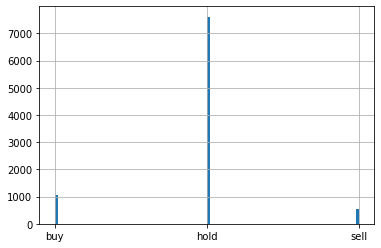

In [10]:
result['label'].hist(bins=100)

In [9]:
result.to_csv('Apple Stock-labelled.csv')